In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
veri_seti=pd.read_csv("used_car.csv")

In [19]:
veri_seti

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [20]:
veri_seti.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
veri_seti.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
veri_seti.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [22]:
veri_seti.duplicated().sum()

2

In [23]:
veri_seti=veri_seti.drop_duplicates()
veri_seti.duplicated().sum()

0

Sayısal olmayan değerleri sayısal biçime çevirme 

In [24]:
print(len(veri_seti["Car_Name"].unique()))
veri_seti["Car_Name"].unique()

98


array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car_name_yeni = label_encoder.fit_transform(veri_seti["Car_Name"])
print("Sayısala Çevrilen Değerler:", car_name_yeni)
print("Araba Modelleri - Sayısal Değer Eşleşmesi:")
for i, car_name in enumerate(veri_seti["Car_Name"]):
    print(f"{car_name} -> {car_name_yeni[i]}")

Sayısala Çevrilen Değerler: [90 93 68 96 92 95 68 91 68 68 62 68 68 76 73 76 76 96 93 63 85 93 63 96
 92 92 92 63 68 90 90 92 76 73 93 73  0 63 93 65 63 93 73 89 68 90 96 76
 68 81 81 86 81 86 71 77 71 78 81 71 77 81 81 81 80 86 81 71 71 80 71 71
 80 77 78 71 70 71 81 71 79 86 86 86 67 88 71 80 78 71 86 86 71 71 86 71
 71 81 49 56 42 11 46 43 40 48 48 46 42 48 41 44 46 46 46 49 46 49 17 48
 45 46 47 47  6  4 32 60 32 58  6  6 51 14 37 20 32  7 37  5 57 57 12 51
 20 60 15 15 52 26 16 16 61 31 54 60 38 31  8 52 16  7 28  1 25 51 34 28
 59 25 13  2 35 22 39 30 53 39 23 27 33  9 14 50 55 36 21 29 14 10 24 19
 18  3  1 36 10 33 14 84 82 83 75 82 97 82 84 82 83 74 72 84 82 94 75 75
 94 94 75 84 84 94 94 83 82 83 94 84 94 94 74 82 82 94 75 72 94 75 94 97
 97 84 94 94 84 94 83 84 72 69 66 69 69 66 69 69 69 64 69 66 64 87 64 87
 64 69 66 69 69 69 69 87 66 69 69 69 87 69 66 69 69 69 66 87 87 64 69 69
 64 66 87 69 64 69 69 66 69 69 66]
Araba Modelleri - Sayısal Değer Eşleşmesi:
ritz -> 90
sx4 -> 

In [29]:
veri_seti_yeni = veri_seti.copy()
veri_seti_yeni["Car_Name"] = car_name_yeni
veri_seti.head()
veri_seti_yeni.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,68,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,96,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,92,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [152]:
veri_seti

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [33]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder_transmission = OrdinalEncoder()
transmission_yeni = ordinal_encoder_transmission.fit_transform(veri_seti_yeni[['Transmission']])
veri_seti_yeni["Transmission"] = transmission_yeni
veri_seti_yeni.head()
veri_seti["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [34]:
print(len(veri_seti["Fuel_Type"].unique()))
veri_seti["Fuel_Type"].unique()

3


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [40]:
ordinal_encoder_Fuel_Type = OrdinalEncoder()
Fuel_Type_yeni = ordinal_encoder_Fuel_Type.fit_transform(veri_seti[["Fuel_Type"]])
print(Fuel_Type_yeni)
veri_seti_yeni["Fuel_Type"] = Fuel_Type_yeni

[[2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

In [48]:
print(len(veri_seti["Seller_Type"].unique()))
veri_seti["Seller_Type"].unique()

2


array(['Dealer', 'Individual'], dtype=object)

In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder_Seller_Type = OrdinalEncoder()
Seller_Type_yeni = ordinal_encoder_Seller_Type.fit_transform(veri_seti_yeni[['Seller_Type']])
veri_seti_yeni["Seller_Type"] = Seller_Type_yeni
veri_seti_yeni.head()
veri_seti["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [50]:
veri_seti_yeni.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,93,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,68,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,96,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,92,2014,4.60,6.87,42450,1.0,0.0,1.0,0


ÇOKLU REGRESYON

In [90]:
X = veri_seti_yeni.drop("Selling_Price",axis=1)
y = veri_seti_yeni["Selling_Price"]

In [91]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [92]:
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2.0,0.0,1.0,0
1,93,2013,9.54,43000,1.0,0.0,1.0,0
2,68,2017,9.85,6900,2.0,0.0,1.0,0
3,96,2011,4.15,5200,2.0,0.0,1.0,0
4,92,2014,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1.0,0.0,1.0,0
297,66,2015,5.90,60000,2.0,0.0,1.0,0
298,69,2009,11.00,87934,2.0,0.0,1.0,0
299,69,2017,12.50,9000,1.0,0.0,1.0,0


In [76]:
model = LinearRegression()

1. YÖNTEM EĞİTİM VE TEST VERİLERİNİN ORANSAL OLARAK AYRILMASI

In [93]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20,random_state=42)
model.fit(X_train,y_train)

LinearRegression()

In [94]:
print ("Katsayılar: ", model.coef_)
print("Katsayı Sayısı: ", model.coef_.shape)
print ("Kesme Erimi: ", model.intercept_)

Katsayılar:  [ 5.36068748e-03  3.44625238e-01  4.40638641e-01 -9.33263587e-06
 -1.19107358e+00 -1.06508012e+00 -1.58137441e+00  7.67644957e-01]
Katsayı Sayısı:  (8,)
Kesme Erimi:  -688.7831655883381


In [98]:
y_predict = model.predict(X_test)

In [99]:
r2_score(y_test,y_predict)

0.7352559076588674

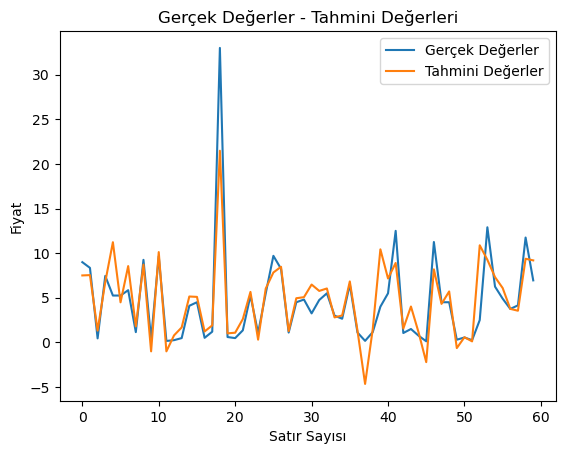

In [100]:
plt.plot(np.array(y_test),label="Gerçek Değerler")
plt.plot(y_predict,label="Tahmini Değerler")
plt.title('Gerçek Değerler - Tahmini Değerleri')
plt.xlabel('Satır Sayısı')
plt.ylabel('Fiyat')
plt.legend()


In [101]:
mse_1 = mean_squared_error(y_true = y_test,y_pred = y_predict)
print("1. Yöntemin MSE'si:",mse_1)
mae_1 = mean_absolute_error(y_true = y_test,y_pred = y_predict)
print("1. Yöntemin MAE'si:",mae_1)
rmse_1 = np.sqrt(mse_1)
print("1. Yöntemin RMSE'si:",rmse_1)

1. Yöntemin MSE'si :  6.823318913692223
1. Yöntemin MAE'si :  1.571163685627941
1. Yöntemin RMSE'si :  2.612148333018671


2.YÖNTEM CROSS VALIDATION() İLE EĞİTİM TESTİN AYRILMASINDA KULLANIMI R2 VE HATALAR

In [102]:
from sklearn.model_selection import cross_val_predict
y_predictCV = cross_val_predict(model,X,y,cv=10)
r2_scoreCV = r2_score(y , y_predictCV)
r2_scoreCV  

0.8146349144093518

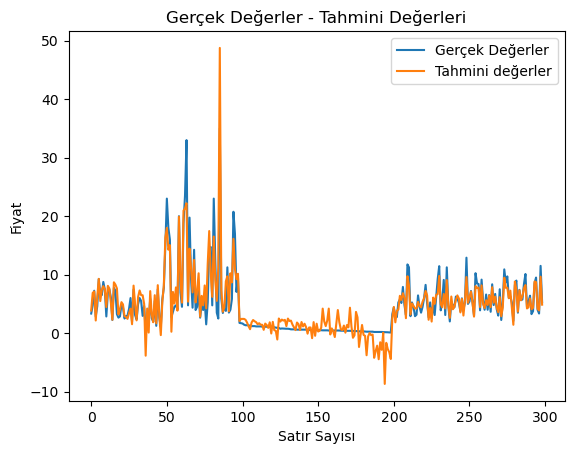

In [103]:
plt.plot(np.array(y),label="Gerçek Değerler")
plt.plot(y_predictCV,label="Tahmini değerler")
plt.xlabel('Satır Sayısı')
plt.ylabel('Fiyat')
plt.title('Gerçek Değerler - Tahmini Değerleri')
plt.legend()

In [115]:
mse_2 = mean_squared_error(y_true=y, y_pred=y_predictCV)
print("2. Yöntemin MSE'si:", mse_2)
mae_2 = mean_absolute_error(y_true=y, y_pred=y_predictCV)
print("2. Yöntemin MAE'si:", mae_2)
rmse_2 = np.sqrt(mse_2)
print("2. Yöntemin RMSE'si:", rmse_2)

2. Yöntemin MSE'si: 4.589557846705491
2. Yöntemin MAE'si: 1.3724167841004837
2. Yöntemin RMSE'si: 2.1423253363356114


3. YÖNTEM GRİDSEARCH İLE R2 VE HATALARIN BULUNMASI

In [124]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept': [True,False], 'copy_X': [True,False], 'positive':[True,False]}
grid = GridSearchCV(model, parameters, cv=10)
grid.fit(X_train, y_train)
y_predictGrid = grid.predict(X_test)
print (grid.best_score_)

0.8721104912818163


In [122]:
r2_scoreGrid = r2_score(y_test,y_predictGrid)
r2_scoreGrid

0.7352559076588674

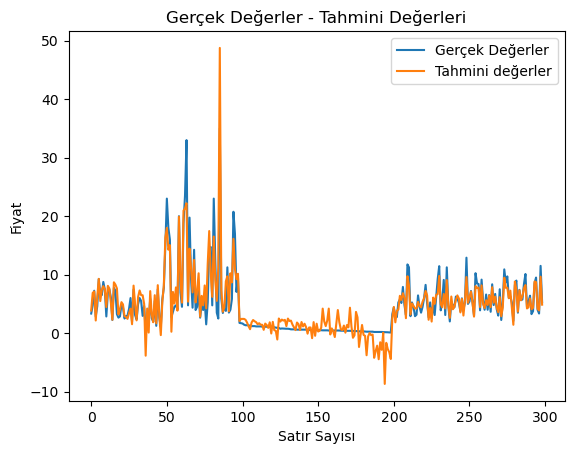

In [120]:
plt.plot(np.array(y),label="Gerçek Değerler")
plt.plot(y_predictCV,label="Tahmini değerler")
plt.xlabel('Satır Sayısı')
plt.ylabel('Fiyat')
plt.title('Gerçek Değerler - Tahmini Değerleri')
plt.legend()

In [121]:
mse_3 = mean_squared_error(y_true = y_test,y_pred = y_predictGrid)
print("3. Yöntemin MSE'si:",mse_3)
mae_3 = mean_absolute_error(y_true = y_test,y_pred = y_predictGrid)
print("3. Yöntemin MAE'si:",mae_3)
rmse_3 = np.sqrt(mse_3)
print("3. Yöntemin RMSE'si:",rmse_3)

3. Yöntemin MSE'si: 6.823318913692223
3. Yöntemin MAE'si: 1.571163685627941
3. Yöntemin RMSE'si: 2.612148333018671


A2 İKİNCİ ANALİZ ÖĞESİ VERİSETİNDEN BAZI ÖZELLİKLERİN ÇIKARILMASI

YÜKSEK KORELASYONLU ÖZELLİKLERE GÖRE ÇIKARMA

In [125]:
for col in X.columns:
    en_yuksek_korelasyonlar = abs(X.corr()[col]).nlargest(n=5)
    for index , value in en_yuksek_korelasyonlar.items():
        if 1 > value >= 0.7:
            print(index,col,"değişkenleri yüksek korelasyona sahiptir.",value)

Seller_Type Car_Name değişkenleri yüksek korelasyona sahiptir. 0.8292546077523152
Car_Name Seller_Type değişkenleri yüksek korelasyona sahiptir. 0.8292546077523152


In [138]:
X_K=X.copy()
X_K.drop("Car_Name",axis=1,inplace=True)
y_K = y.copy()
X_K.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2.0,0.0,1.0,0
1,2013,9.54,43000,1.0,0.0,1.0,0
2,2017,9.85,6900,2.0,0.0,1.0,0
3,2011,4.15,5200,2.0,0.0,1.0,0
4,2014,6.87,42450,1.0,0.0,1.0,0


In [147]:
X_train_K , X_test_K , y_train_K , y_test_K = train_test_split(X_K,y_K, test_size=0.20,random_state=42)
model_K = LinearRegression()
model_K.fit(X_train_K,y_train_K)
parameters = {'fit_intercept': (True,False), 'copy_X': (True,False), 'positive':(True,False)}
gridK = GridSearchCV(model_K, parameters, cv=10)
gridK.fit(X_train_K, y_train_K)
y_grid_predictK = gridK.predict(X_test_K)
r2_scoreGridK = r2_score(y_test_K,y_grid_predictK)
r2_scoreGridK

0.7410829335730036

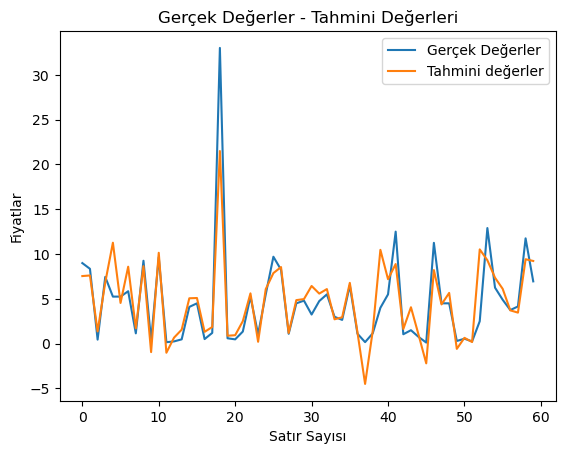

In [128]:
plt.plot(np.array(y_test_K),label="Gerçek Değerler")
plt.plot(y_grid_predictK,label="Tahmini değerler")
plt.xlabel('Satır Sayısı')
plt.ylabel('Fiyatlar')
plt.title('Gerçek Değerler - Tahmini Değerleri')
plt.legend()

In [151]:
mse_K = mean_squared_error(y_true = y_test_K ,y_pred = y_grid_predictK)
print("Korelasyondan sonraki MSE : ",mse_K)
mae_K = mean_absolute_error(y_true = y_test_K,y_pred = y_grid_predictK)
print("Korelasyondan sonraki MAE : ",mae_K)
rmse_K = np.sqrt(mae_K)
print("Korelasyondan sonraki RMSE : ",rmse_K)

Korelasyondan sonraki MSE :  6.673137446831509
Korelasyondan sonraki MAE :  1.541071812283851
Korelasyondan sonraki RMSE :  1.2413991349617781
